In [4]:
import tensorflow as tf
#Want to use CIFAR-10 dataset
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

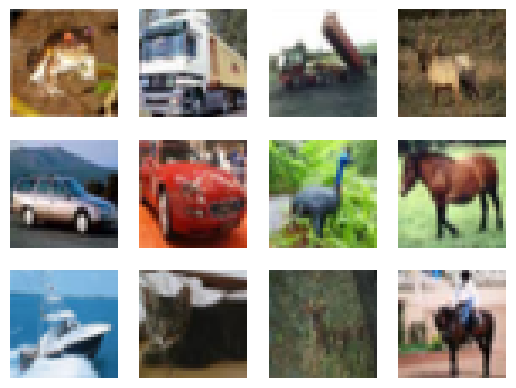

In [11]:
#Step 1: Load the dataset
data = datasets.cifar10.load_data()
#data

#plot some images from dataset
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(data[0][0][i])
    plt.axis('off')
plt.show()

In [16]:
#Split the data into training and testing sets
(X_train, y_train), (X_test, y_test) = data

In [17]:
#Normalize the pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [18]:
#X_train

In [19]:
#Flaten the images
y_train = y_train.flatten()
y_test = y_test.flatten()

In [21]:
#Build the CNN model
cnn_model = models.Sequential()

#1st Convolutional Layer
cnn_model.add(layers.Conv2D(32, (3 , 3), activation='relu', input_shape=(32, 32, 3)))
cnn_model.add(layers.MaxPooling2D((2, 2)))

#2nd Convolutional Layer
cnn_model.add(layers.Conv2D(64, (3 , 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))

#3rd Convolutional Layer
cnn_model.add(layers.Conv2D(64, (3 , 3), activation='relu'))
cnn_model.add(layers.Flatten())

#Fully Connected Layer
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(10, activation='softmax'))

print(cnn_model.summary())



c:\Users\sonum\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

None


In [24]:
#Compile the model
cnn_model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
#History object to store training details
#history_cnn = cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
history_cnn = cnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.8155 - loss: 0.5326 - val_accuracy: 0.7975 - val_loss: 0.5723
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.8283 - loss: 0.4958 - val_accuracy: 0.8017 - val_loss: 0.5623
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.8395 - loss: 0.4610 - val_accuracy: 0.7873 - val_loss: 0.6188
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.8473 - loss: 0.4398 - val_accuracy: 0.7904 - val_loss: 0.6072
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.8514 - loss: 0.4213 - val_accuracy: 0.7836 - val_loss: 0.6250
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.8609 - loss: 0.3961 - val_accuracy: 0.7815 - val_loss: 0.6359
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.8693 - loss: 0.3684 - val_accuracy: 0.7818 - val_loss: 0.6596
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.8788 - loss: 0.3451 - 

In [29]:
#eval_loss, eval_acc
cnn_loss , cnn_acc = cnn_model.evaluate(X_test, y_test ,verbose=2)
print(f"Test Accuracy: {cnn_acc}, Test Loss: {cnn_loss}")

313/313 - 2s - 6ms/step - accuracy: 0.6944 - loss: 1.1508
Test Accuracy: 0.6944000124931335, Test Loss: 1.1507514715194702


In [30]:
#Cifar-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
!pip install opencv-python

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Predicted Class: truck


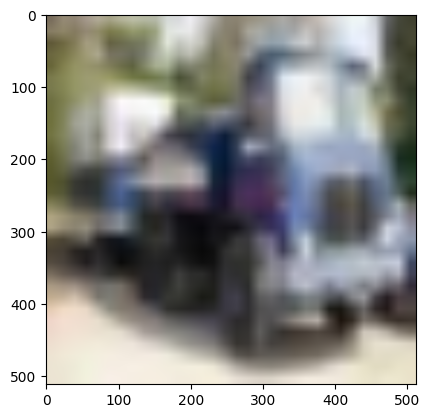

In [43]:
#Predict some images from test set
import cv2
import numpy as np

#pic the index
index = 28
img = X_test[index]

#Resize the image to 32x32 pixels (CIFAR-10 size)
display_img = cv2.resize(img, (512, 512))
plt.imshow(display_img)


#Predict the class
img = np.expand_dims(img, axis=0)  #Add batch dimension
predictions = cnn_model.predict(img)
predicted_class = np.argmax(predictions[0])
print(f"Predicted Class: {class_names[predicted_class]}")